In [21]:
%matplotlib inline

# Training Q-Learning to play Black Jack with Basic Strategy

-  *Object of the Player:* Each player tries to obtain a total that is greater than that of the dealer
but that does not exceed 21

Current version os non-Natural Black Jack, where the dealer does not check for Black Jack when showing an Ace or a 10-value card.

### 1.Task
- Environment Setup: Create an environment for the Blackjack game. This environment should be able to take actions as input (like hit, stand, etc.) and return the new state and reward.

In [22]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [23]:
class BlackjackEnvironment:
    def __init__(self):
        self.deck = self.generate_deck()
        self.player_hand = []
        self.dealer_hand = []
        self.split_hand = []
        self.doubled_down = False
        
        self.reward_queue = []  
        self.length_queue = []  
        
        self.reset()

    
    def generate_deck(self):
        suits = ['hearts', 'diamonds', 'clubs', 'spades']
        values = list(range(2, 11)) + ['jack', 'queen', 'king', 'ace']
        return [str(value) + '_' + suit for value in values for suit in suits]
    
    def draw_card(self):
        return self.deck.pop(random.randint(0, len(self.deck) - 1))

    def reset(self):
        self.deck = self.generate_deck()
        self.player_hand = [self.draw_card(), self.draw_card()]
        self.dealer_hand = [self.draw_card(), self.draw_card()]

    def card_value(self, card):
        value = card.split('_')[0]
        if value in ['jack', 'queen', 'king']:
            return 10
        elif value == 'ace':
            return 11
        else:
            return int(value)

    def hand_value(self, hand):
        value = sum(self.card_value(card) for card in hand)
        if value > 21 and any(card.startswith('ace') for card in hand):
            value -= 10
        return value
    
    def is_soft(self, hand):
        return any(card.startswith('ace') for card in hand) and self.hand_value(hand) <= 21 

    def is_busted(self, hand):
        return self.hand_value(hand) > 21

    def dealer_play(self):
        while self.hand_value(self.dealer_hand) < 17:
            self.dealer_hand.append(self.draw_card())
            
    
    
    def is_pair(self, hand):
        if len(hand) == 2:
            return hand[0].split('_')[0] == hand[1].split('_')[0]
        
    '''
    def play(self):
        self.reset()
        print("Welcome to Blackjack!")
        print(f"Your hand: {self.player_hand}")
        print(f"Dealer's up card: {self.dealer_hand[0]}")

        while True:
            #check if player has a pair
            if self.is_pair(self.player_hand):
                split = input("Do you want to split? (y/n): ").lower()
                if split == 'y':
                    # Player chooses to split and draws a card for each hand.
                    self.split_hand = [self.player_hand.pop()]
                    self.player_hand.append(self.draw_card())
                    self.split_hand.append(self.draw_card())
                    print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                    action1 = input(" Enter for first hand  'h' to hit, 's' to stand").lower()
                    action2 = input(" Enter for second hand 'h' to hit, 's' to stand").lower()
                    
                    if action1 == 'h' and action2 == 'h':
                        self.player_hand.append(self.draw_card())
                        self.split_hand.append(self.draw_card())
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break
                    
                    elif action1 == 'h' and action2 == 's':
                        self.player_hand.append(self.draw_card())
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break 
                
                    elif action1 == 's' and action2 == 'h':
                        self.split_hand.append(self.draw_card())
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break 
                    
                    elif action1 == 's' and action2 == 's':
                        print(f"Your new hands: {self.player_hand}, {self.split_hand}")
                        if self.is_busted(self.player_hand):
                            print("Busted! You First hand lose.")
                        if self.is_busted(self.split_hand):
                            print("Busted! You Second hand lose.")
                        break
                    else: 
                        print("Invalid input. Please try again.")
                    
                else:
                    action = input("Enter 'h' to hit or 's' to stand: ").lower()
                    if action == 'h':
                        self.player_hand.append(self.draw_card())
                        print(f"Your new hand: {self.player_hand}")
                    if self.is_busted(self.player_hand):
                        print("Busted! You lose.")
                        break
                    elif action == 's':
                        self.dealer_play()
                        print(f"Dealer's final hand: {self.dealer_hand}")
                        player_value = self.hand_value(self.player_hand)
                        dealer_value = self.hand_value(self.dealer_hand)

                        if self.is_busted(self.dealer_hand) or player_value > dealer_value:
                            print("You win!")
                        elif dealer_value > player_value:
                            print("You lose.")
                        else:
                            print("It's a tie!")
                        break 
            
            else:
                action = input("Enter 'h' to hit or 's' to stand: ").lower()
                if action == 'h':
                    self.player_hand.append(self.draw_card())
                    print(f"Your new hand: {self.player_hand}")
                    if self.is_busted(self.player_hand):
                        print("Busted! You lose.")
                        break
                elif action == 's':
                    self.dealer_play()
                    print(f"Dealer's final hand: {self.dealer_hand}")
                    player_value = self.hand_value(self.player_hand)
                    dealer_value = self.hand_value(self.dealer_hand)

                    if self.is_busted(self.dealer_hand) or player_value > dealer_value:
                        print("You win!")
                    elif dealer_value > player_value:
                        print("You lose.")
                    else:
                        print("It's a tie!")
                    break 
                
    '''         
            
                
    def step(self, action):
        
        # Perform the given action ('h' for hit, 's' for stand) and return the next state, reward, and if the game has ended.
        if action == 'h':
            # Player chooses to hit and draws a card.
            self.player_hand.append(self.draw_card())
            if self.is_busted(self.player_hand):
                self.reward_queue.append(-1)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                if self.doubled_down:
                    return 'terminal', -2, True
                else:
                # Player is busted and loses the game.
                    return 'terminal', -1, True
                
                
        elif action == 's':
            # Player chooses to stand and the dealer plays their turn.
            self.dealer_play()
            player_value = self.hand_value(self.player_hand)
            dealer_value = self.hand_value(self.dealer_hand)

            if self.is_busted(self.dealer_hand) or player_value > dealer_value:
                # Player wins if the dealer is busted or has a lower hand value.
                self.reward_queue.append(1)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                return 'terminal', 1, True
            elif dealer_value > player_value:
                # Player loses if the dealer has a higher hand value.
                self.reward_queue.append(-1)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                return 'terminal', -1, True
            else:
                # The game is a tie if the player and dealer have the same hand value.
                self.reward_queue.append(0)  # Update return_queue
                self.length_queue.append(len(self.player_hand))  # Update length_queue
                return 'terminal', 0, True
            
        elif action == 'p' and self.is_pair(self.player_hand):
                # Player chooses to split and draws a card for each hand.
                self.split_hand = [self.player_hand.pop()]
                self.player_hand.append(self.draw_card())
                self.split_hand.append(self.draw_card())
                return self.get_state(), 0, False
            
        elif action == 'd':
                # Player chooses to double down and draws a card.
                self.doubled_down = True
                self.player_hand.append(self.draw_card())
                if self.is_busted(self.player_hand):
                    # Player loses twice their bet 
                    return  'terminal', -2, True
                return self.get_state(), 0, False
        
        # If the game is not over, return the current state, reward of 0, and False for not done.
        return self.get_state(), 0, False

    def get_state(self):
        # Return the current state as a tuple containing the player's hand value and the dealer's up card value.
        return (self.hand_value(self.player_hand), self.card_value(self.dealer_hand[0]), self.is_soft(self.player_hand), len(self.split_hand) > 0, self.doubled_down)


### Task 2
- *Agent Implementation:* Implement a reinforcement learning agent. This agent should have a policy that it follows, and it should be able to update this policy based on the rewards it gets.

Agent Action: 1 = Hit, 0 = Stand, 2= Split, 3 = Double Down 

To ensure that the agents explores the environment, one possible solution is the epsilon-greedy strategy. This strategy takes a random action with probability epsilon, and the best action based on the policy with probability 1-epsilon. 



Notice that Table 3.1 recommends drawing on all hard totals of 11 or
less. This is reasonable because a player who does this cannot bust and
must increase his total. Table 3.1 is a pictorial list of “hard standing numbers.” The hard standing
number for a certain dealer’s up card is simply the smallest total you stand
on against that up card. For example, if the dealer shows a Seven, then
Table 3.1 shows the standing number is 17. This is your goal with a hard
hand. You stand on hard totals of 17 or more. You draw with hard totals of
16 or less. When the dealer shows a Six as an up card, the standing number
drops to 12! Now you stand on 12 or more and draw on 11 or less.
The person who is comfortable with the basic strategy can add the
refinements noted. They happen to be for a dealer’s up card of Ten. The
refinement for totals of hard 16 against a Ten actually considers cards in
addition to the player’s hole cards. This anticipates later results.
Notice also that if you stand on a given total against a dealer’s given up
card, you also stand on all higher totals against that up card. Similarly, if
you draw on a given total against a given up card, you also draw to all
lower totals against that up card. When your hand is soft, use Table 3.2 in order to decide whether to draw
or stand. Tables 3.1 and 3.2 are read in the same way. However, when we
compare them, we see that drawing is recommended for much higher totals
with soft hands than with hard hands. Part of the reason for this difference
will be clear from the following argument. Remember we saw that a player
with a hard total of 11 or less has nothing to lose by drawing one or more
card. Similarly, a player with a soft total of 16 or less has nothing to lose.
Since his hand is soft, he cannot bust by drawing a card because if it puts
him over 21 when he continues to count the Ace as 11, he automatically
counts it as 1 instead. This reduction of 10 in his total will keep the player
from busting no matter which card was drawn. If an Ace was drawn, it can
be counted as 1, if necessary, and any other card will have a numerical
value of 10 or less.
Since the player with a soft total of 16 or less cannot bust by drawing one
more card, he cannot make his total poorer. This is because all final, or
“standing,” totals of 16 or less are equivalent. If you stand and the dealer
busts, you win the same amount no matter what your total is. Whether it is
16 or less than 16 makes no difference. If you stand on 16 or less and the
dealer does not bust, then by the rules he must have ended up with a total
between 17 and 21. Thus he automatically beats all totals of 16 and under.
Therefore, if you draw to soft 16 or less, you cannot harm yourself. In fact,
you may even be able to help yourself. For example, on holding (A,5), you
improve your chances to tie or win if the card you draw is any one of the
group A,2,3,4,5; on holding (A,2,A), you improve your chances to tie or win
if the card you draw is any one of the group 3,4,5,6,7.
When drawing to a soft 17, there is a small possibility of loss. If you
stand and the dealer also has 17, you will tie him and thus avoid losing your
bet. However, if you draw to soft 17, you may convert your hand into a hard
hand that totals less than 17. If you then stand on this, you are worse off
than before, for the dealer may end up with exactly 17 and now you lose,
whereas you would have tied. If you draw to this hard hand, you may bust
and lose at once. For example, with (A,3,3)=soft 17, suppose a Five is
drawn to make (A,3,3,5)=hard 12. If the dealer shows a Five, Table 3.4
recommends standing. If the dealer shows an Ace, the table recommends
drawing. If a Ten is drawn, we reach (A,3,3,5,10)=22 (even counting the
Ace as one) and bust.
Despite this chance of making your hand poorer by drawing to a soft 17,
calculations show that this risk is more than offset by the possibility of
improving your hand. Thus, with (A,6), you may draw an A,2,3, or 4, all of
which improve your hand. Even if you draw a 5,6,7,8,9, or 10, you do not
bust. You still have another draw, if you wish, with which to try for a good
total.
It sometimes takes a little will power to follow these instructions. More
than once I have been confronted with heart-stoppers like this. I was
playing a “big-money” game in a certain Nevada casino. By the cardcounting methods of later chapters, I knew that I had a 5 per cent edge on
the next round of play. Therefore, I had placed the maximum bet of $500.
The dealer’s up card was a 7. I was dealt (A,6), a soft 17. Since the
remaining cards in the deck consisted largely of Tens, I was fairly certain
that the dealer had 17. Since there were only four cards that would help me
—the A,2,3,4—and five that would hurt me—the 5,6,7,8,9, I was reluctant
to draw and was inclined to play for a tie. Nevertheless, I gritted my teeth
and drew once, receiving an 8. I now held hard 15. I held my breath and
drew again; this time I received an Ace. I now held hard 16. Resignedly, I
drew again, receiving—to my amazement—a 3. I now decided to stand with
my hard 19. When the dealer exposed his hand, to my surprise he held what
happened to be the only Ace yet unaccounted for (one had already appeared
on an earlier round of play). According to the rules of the game he was
required to stand. The basic strategy not only produced the one line of play
that could save the $500, it doubled the money besides.
We see from Table 3.2 that there are minimum standing numbers for soft
hands similar to those for hard hands. Thus you should draw if your soft
total is less than the soft standing number given for the current up card of
the dealer, and stand if your soft total is greater than or equal to this
standing number. The reader who practices with the basic strategy will soon
know the standing numbers well enough to dispense with Tables 3.1 and
3.2.
Suppose now that you go into a casino to practice using the standing
numbers. You never double down, never split pairs, and never insure. How
will you do? Surprisingly enough, the casino edge will be only about 2 per
cent. Your game is already close to even. It is better than the methods
recommended until recently by the world’s foremost card experts (see, for
example, [8]).

In [24]:

class QLearningAgent:
    def __init__(self, env, num_episodes, initial_epsilon, epsilon_decay, final_epsilon, alpha=0.1, gamma=0.99):
        # Initialize the Q-learning agent with the given environment and learning parameters.
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = initial_epsilon  # Exploration rate
        self.num_episodes = num_episodes  # Number of episodes to train
        self.epsilon_decay = epsilon_decay # Decay rate for epsilon
        self.final_epsilon = final_epsilon
        self.Q = {}  # Q-value dictionary mapping (state, action) pairs to Q-values
        self.training_error = []

    def get_Q(self, state, action):
        return self.Q.get((state, action), 0)
    

    def choose_action(self, state):
        '''
        Choose an action to take in the given state based on the current Q-values and exploration rate.
        '''      
        # check if player has soft hand 
        if self.env.is_soft(self.env.player_hand):
            soft_action = self.soft_standing_action(state)
            return soft_action
        else: 
            hard_action = self.hard_standing_action(state)
            return hard_action
            
                  
    def hard_standing_action(self, state):
        # player hand 
        player_hand_value = state[0]
        
        # dealers hand
        dealers_hand = state[1]
        
        # Table 3.1 recommends drawing on all hard totals of 11 or less.
        if player_hand_value <= 11:
            return 'h'
        # Table 3.1 recommends standing on all hard totals of 17 or more.
        elif player_hand_value >= 17:
            return 's'
        # Table 3.1 recommends drawing on all hard totals of 12 through 16 if the dealer's up card is 7 or more.
        elif 12 <= player_hand_value <= 16 and dealers_hand >= 7:
            return 'h'
        # Table 3.1 recommends standing on all hard totals of 12 through 17 if the dealer's up card is 6 until 4
        elif 12 <= player_hand_value <= 17 and 4 <= dealers_hand <= 6:
            return 's'
        # Table 3.1 recommends standing on all hard totals of 13 through 17 if the dealer's up card is 2 or 3
        elif 13 <= player_hand_value <= 17 and (dealers_hand == 2 or dealers_hand == 3):
            return 's'
        # Table 3.1 recommends drawing on all hard totals of 12 if the dealer's up card is 2 or 3.
        elif player_hand_value == 12 and (dealers_hand == 2 or dealers_hand == 3):
            return 'h'
        else:
            return 'h'  # default action
        # if you stand on a given total against a dealer’s given up card, you also stand on all higher totals against that up card. 
        # Similarly, if you draw on a given total against a given up card, you also draw to all lower totals against that up card.
        

    def soft_standing_action(self, state):
        # player hand
        player_hand_value = state[0]
        dealer_hand = state[1]
        # Table 3.2 recommends drawing on all soft totals of 17 or less.
        if player_hand_value <= 17:
            return 'h'
        # Table 3.2 recommends standing if the player has a soft 18 and the dealer's up card is 9 an 10
        elif player_hand_value == 18 and (dealer_hand == 9 or dealer_hand == 10):
            return 'h'
        else :
            return 's'



    def update(self, state, action, next_state, reward):
        # Update the Q-value table using the Q-learning update rule.

        # Get the current Q-value for the given state and action.
        current_q = self.Q.get((state, action), 0)
        
        # Get the maximum Q-value for the next state across all actions.
        next_q = max(self.Q.get((next_state, a), 0) for a in ['h', 's'])
        
        # Training error
        temporal_difference = reward + self.gamma * next_q - current_q
        
        # Update the Q-value for the current state and action using the Q-learning update rule. 
        self.Q[(state, action)] = current_q + self.alpha * temporal_difference
        
        # Append the temporal difference to the training error list.
        self.training_error.append(temporal_difference)
    
    # Decay epsilon
    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - self.epsilon_decay)
    
    def train(self, num_episodes):
    # Train the Q-learning agent by running the algorithm for the specified number of episodes.
        for episode in range(num_episodes):
            # Loop through each episode in the total number of episodes to train.
            self.env.reset()
            # Reset the environment at the start of each episode.
            state = self.env.get_state()
            # Get the initial state from the environment.
            done = False
            # Set the "done" flag to False, indicating that the episode is not yet finished.
            while not done:
                # Choose an action based on the current state using the Q-learning agent's policy.
                action = self.choose_action(state)
                # Take the chosen action in the environment and receive the next state, reward, and a flag indicating if the episode is done.
                next_state, reward, done = self.env.step(action)
                # Update the Q-value table using the current state, action, next state, and reward.
                self.update(state, action, next_state, reward)
                # Update the current state to be the next state for the next iteration of the loop.
                state = next_state  
            # Decay epsilon
            self.decay_epsilon()

    
    def play_game(self):
        self.env.reset()
        state = self.env.get_state()
        done = False
        print("Welcome to Blackjack!")
        print(f"Your hand: {self.env.player_hand}")
        print(f"Dealer's up card: {self.env.dealer_hand[0]}")

        while not done:
            action = self.choose_action(state)
            print(f"Agent chooses to {'hit' if action == 'h' else 'stand'}")
            state, reward, done = self.env.step(action)

        print("Final hands:")
        print(f"Your hand: {self.env.player_hand}")
        print(f"Dealer's hand: {self.env.dealer_hand}")

        if reward == 1:
            print("You win!")
        elif reward == -1:
            print("You lose.")
        else:
            print("It's a tie!")
            


### Task 3
- Training: Train the agent by playing many games of Blackjack and updating the policy after each game. Plot the average reward received per game over time (say, every 1000 games), and report your findings. Does your agent learn an optimal policy?

In [25]:
if __name__ == "__main__":
    
    # Hyperparameters
    num_episodes = 100000
    initial_epsilon = 1.0
    epsilon_decay = initial_epsilon / (num_episodes / 2)  # reduce the exploration over time
    final_epsilon = 0.1
    
    env = BlackjackEnvironment()
    agent = QLearningAgent(env, num_episodes, initial_epsilon, epsilon_decay, final_epsilon)
    
    # Train the agent
    agent.train(num_episodes)
    
    

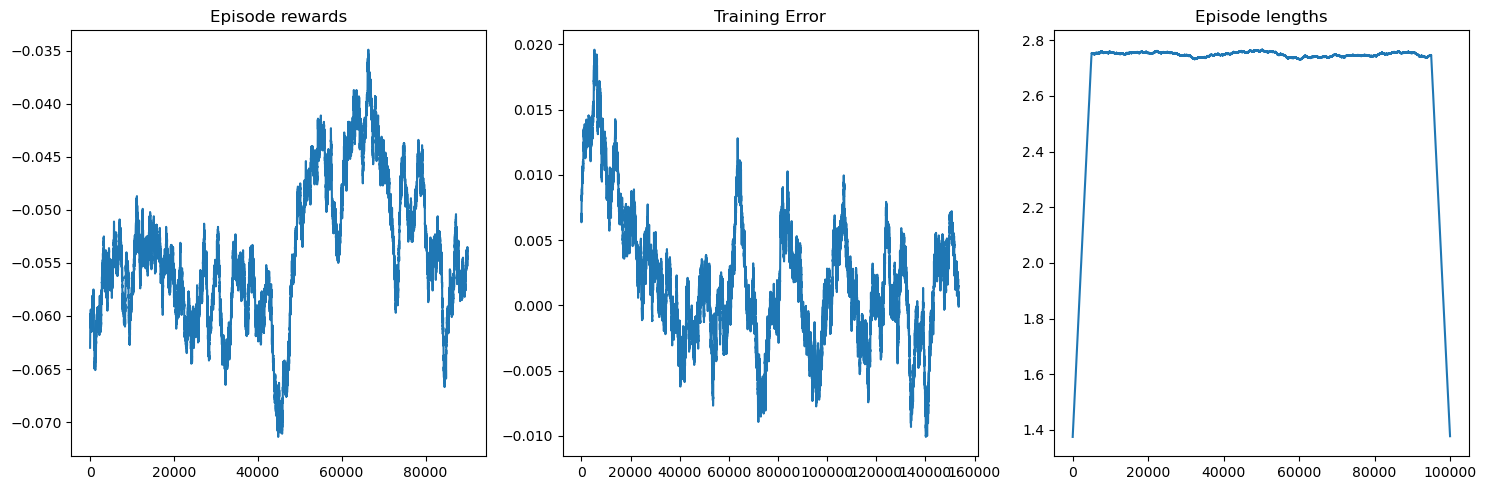

In [26]:

# Visualize the agent training 
length_step = 10000
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
axs[0].set_title('Episode rewards')

# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = (np.convolve(np.array(env.reward_queue).flatten(), np.ones(length_step), mode="valid")/ length_step)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)

axs[1].set_title("Training Error")
training_error_moving_average = (np.convolve(np.array(agent.training_error), np.ones(length_step), mode="same") / length_step)
axs[1].plot(range(len(training_error_moving_average)), training_error_moving_average)

axs[2].set_title("Episode lengths")
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(), np.ones(length_step), mode="same")/ length_step)
axs[2].plot(range(len(length_moving_average)), length_moving_average)

plt.tight_layout()
plt.show()  
    

### Task 4
- Evaluation: Evaluate the agent by having it play many games without updating the policy and see how often it wins. Compare this to a random agent that simply takes random actions at each step. Does your agent perform better than this random agent?

In [27]:
def evaluate_agent(agent, num_games=1000):
    wins = 0
    losses = 0
    ties = 0

    for _ in range(num_games):
        agent.env.reset()
        state = agent.env.get_state()
        done = False

        while not done:
            action = max(['h', 's'], key=lambda action: agent.Q.get((state, action), 0))
            state, reward, done = agent.env.step(action)

        if reward > 0:
            wins += 1
        elif reward < 0:
            losses += 1
        else:
            ties += 1

    win_rate = wins / num_games
    loss_rate = losses / num_games
    tie_rate = ties / num_games

    return win_rate, loss_rate, tie_rate

win_rate, loss_rate, tie_rate = evaluate_agent(agent, num_games=10000)
print(f"Win rate: {win_rate:.2f}, Loss rate: {loss_rate:.2f}, Tie rate: {tie_rate:.2f}")


Win rate: 0.38, Loss rate: 0.57, Tie rate: 0.06


N = 100000
1. The simple greedy epsilon strategy with decaying epsilon. The result:  `Win rate: 0.40, Loss rate: 0.51, Tie rate: 0.09`
2. The hard action is adjusted according to book rules: `Win rate: 0.38, Loss rate: 0.57, Tie rate: 0.05`
3. The hard action is adjusted according to book rules and the soft action is adjusted according to book rules: `Win rate: 0.44, Loss rate: 0.48, Tie rate: 0.08`



### Visualizing the policy
- Visualize the policy that the agent has learned by plotting the value of the state (i.e. the probability of winning) for each possible state of the game. You should plot the value of the state for each possible player hand value (12-21) and each possible dealer hand value (1-10). You should see that the agent has learned to stand when it has a high probability of winning and hit when it has a low probability of winning.

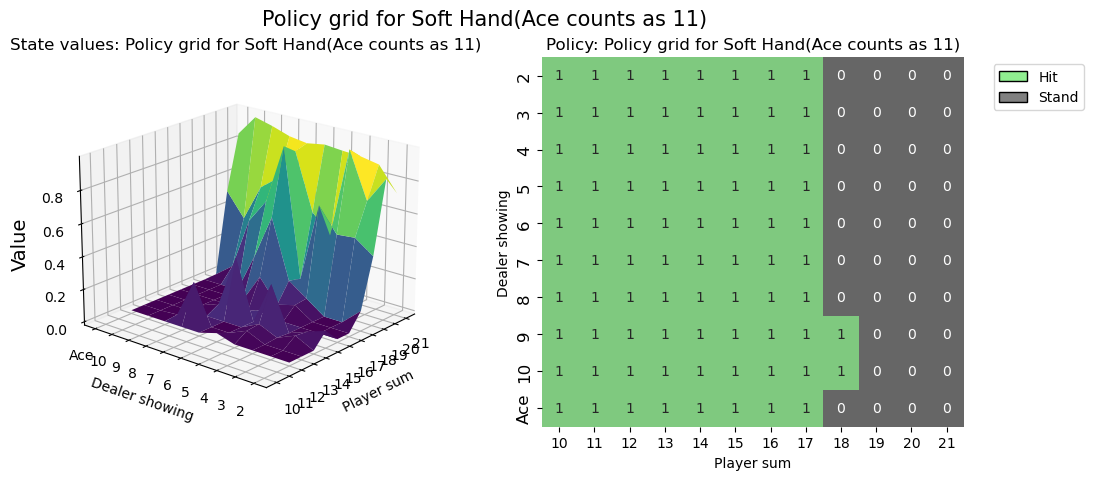

In [28]:
from collections import defaultdict


def create_grids(agent, soft=True):
   """Create value and policy grid given an agent."""
    # convert our state-action values to state values
    # and build a policy dictionary that maps observations to actions
    
   # initialize empty dictionaries for state values and policy 
   state_values = defaultdict(float)
   policy = defaultdict(int)
   
   for state_action in agent.Q.keys():
       state, action = state_action
       #print(state_action)
       #print(state)
       #print(action)
       if state not in policy:
           
           state_values[state] = max(agent.Q.get((state, a), 0) for a in ['h', 's'])
           #print(state_values)

           
           # map 'h' to 1 and 's' to 0
           policy[state] = 1 if action == 'h' else 0
           #policy[state] = action
           #print(action)
           #print(policy)
    
   player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(10, 22),
        np.arange(2, 12),
    )
    
   # get the state values for each player and dealer count
   value = np.apply_along_axis(
        lambda state: state_values.get((state[0], state[1], soft, False,  False)),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
   
   
   value_grid = player_count, dealer_count, value
   
   policy_grid = np.apply_along_axis(
        lambda state: policy.get((state[0], state[1],soft, False, False), 1),
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )
   #print(policy_grid)
   return value_grid, policy_grid
    


# plot the value grid
def plot_grids(value_grid, policy_grid, title: str):
    # crate a plot using balue grid and policy grid
    player_count, dealer_count, value = value_grid
    fig = plt.figure(figsize=plt.figaspect(0.4))
    fig.suptitle(title, fontsize=15)

    
    # plot the state values
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(player_count, dealer_count, value, cmap='viridis')
    plt.xticks(range(10, 22), range(10,22))
    plt.yticks(range(2, 12), [2,3,4,5,6,7,8,9,10,"Ace"])
    ax.set_title(f"State values: {title}")
    ax.set_xlabel("Player sum")
    ax.set_ylabel("Dealer showing")
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel("Value", fontsize=14, rotation=90)
    ax.view_init(20, 220)
    
    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: {title}")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(10, 22))
    
    # 11 is string value for ace, we add it manually
    ax2.set_yticklabels([2,3,4,5,6,7,8,9,10,"Ace"], fontsize=12)
   
    
    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stand"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    return fig

# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, soft=True)
fig = plot_grids(value_grid, policy_grid, title="Policy grid for Soft Hand(Ace counts as 11)")
plt.show()

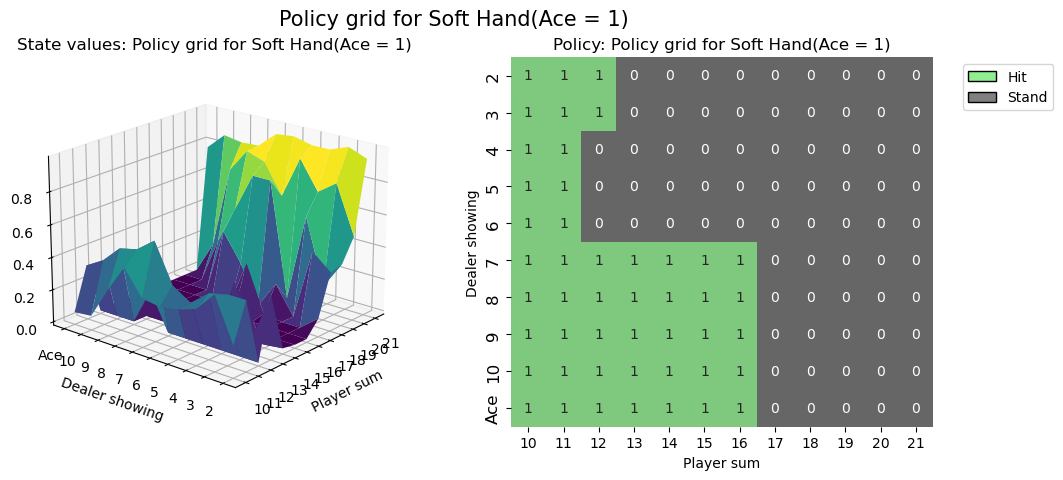

In [29]:
# state values & policy with usable ace (ace counts as 11)
value_grid, policy_grid = create_grids(agent, soft=False)
fig = plot_grids(value_grid, policy_grid, title="Policy grid for Soft Hand(Ace = 1)")
plt.show()